<a href="https://colab.research.google.com/github/drshaheed/Regression-Repo/blob/main/air_quality_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
url = ('/content/drive/MyDrive/Data Colab/AirQualityUCI.csv')
df = pd.read_csv(url, delimiter=';', decimal=',', parse_dates=[['Date', 'Time']])

In [ ]:
# Drop unnecessary columns and rename columns
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
df = df.rename(columns={'Date_Time': 'Date', 'CO(GT)': 'CO', 'C6H6(GT)': 'Benzene', 'NOx(GT)': 'NOx', 'NO2(GT)': 'NO2'})

In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
# Convert data types and remove negative values
cols = ['CO', 'PT08.S1(CO)', 'NMHC(GT)', 'Benzene', 'PT08.S2(NMHC)', 'NOx', 'PT08.S3(NOx)', 'NO2', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df = df[(df[cols] >= 0).all(axis=1)]

In [ ]:
# EDA
print(df.head())
print(df.describe())

                  Date   CO  PT08.S1(CO)  NMHC(GT)  Benzene  PT08.S2(NMHC)  \
0  10/03/2004 18.00.00  2.6       1360.0     150.0     11.9         1046.0   
1  10/03/2004 19.00.00  2.0       1292.0     112.0      9.4          955.0   
2  10/03/2004 20.00.00  2.2       1402.0      88.0      9.0          939.0   
3  10/03/2004 21.00.00  2.2       1376.0      80.0      9.2          948.0   
4  10/03/2004 22.00.00  1.6       1272.0      51.0      6.5          836.0   

     NOx  PT08.S3(NOx)    NO2  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0  166.0        1056.0  113.0        1692.0       1268.0  13.6  48.9  0.7578  
1  103.0        1174.0   92.0        1559.0        972.0  13.3  47.7  0.7255  
2  131.0        1140.0  114.0        1555.0       1074.0  11.9  54.0  0.7502  
3  172.0        1092.0  122.0        1584.0       1203.0  11.0  60.0  0.7867  
4  131.0        1205.0  116.0        1490.0       1110.0  11.2  59.6  0.7888  
               CO  PT08.S1(CO)     NMHC(GT)     Benzene  

<ipython-input-14-80f84658e80c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


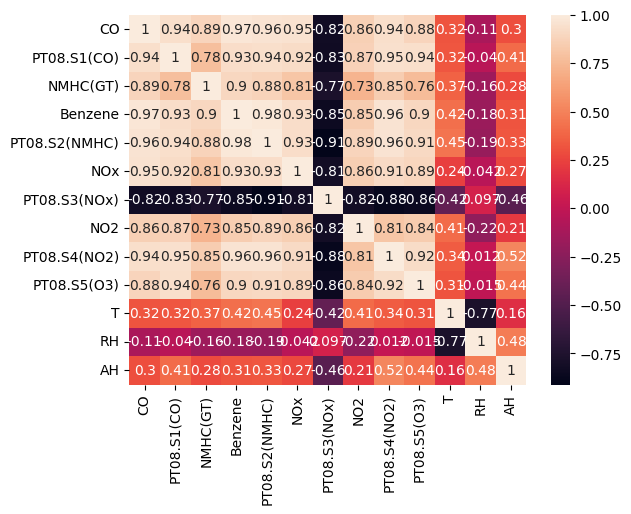

In [ ]:
# Visualize correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

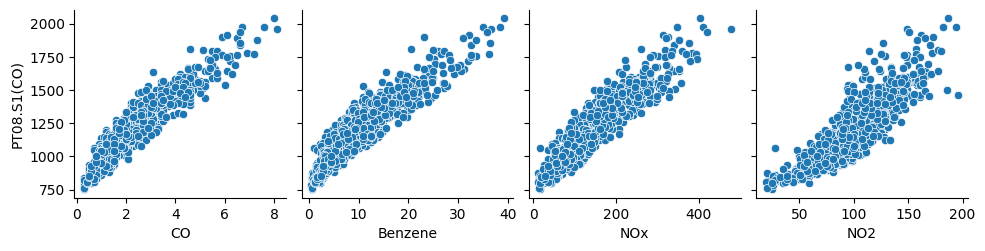

In [ ]:
# Plot target variable against features
sns.pairplot(df, x_vars=['CO', 'Benzene', 'NOx', 'NO2'], y_vars=['PT08.S1(CO)'])
plt.show()



In [ ]:
# Prepare data for modeling
X = df[['CO', 'Benzene', 'NOx', 'NO2', 'T', 'RH', 'AH']]
y = df[['PT08.S1(CO)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train linear regression model
reg = LinearRegression().fit(X_train, y_train)



In [ ]:
# Evaluate model
y_pred = reg.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))



Mean squared error: 5133.63
Coefficient of determination: 0.92


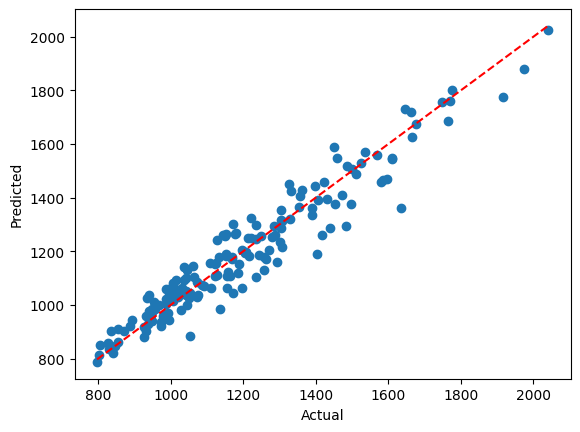

In [ ]:
# Visualize linear regression model
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()